In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-11.869822663803276 13.205208685247015
-18.117828368171374 4.199255143230005
31.93435928566649 -54.88659998920774
-11.038539441889228 -8.836687143834979
62.372304961085234 -124.31452318539414
71.76854411211283 -170.72657998468847
13.581667885126322 117.76641780260218
-30.081505015698603 123.29878539104072
84.58580666360018 -141.98246976603417
-66.95630199288586 -57.55824228662598
72.28156444365112 81.44438454316457
34.252862608082935 22.273833622674772
39.553268885067126 -78.95527588949847
26.57789344177263 -59.92107312578777
-53.92580828489599 -156.01681821255514
32.00077431746496 -59.4663063137875
-84.89981402305814 -136.23137599288037
-28.882193652514225 157.04307162195204
73.63609186276855 -178.42871959479146
34.377891537468315 74.48213889417107
-41.70010746418547 -25.60452267506895
50.67789345955637 -53.933295913115145
-35.73910837896317 -147.33859257837682
-46.070696454534655 -166.22053694335978
58.457237475122525 39.577646949414884
-52.5181687177061 -50.78895787925313
-63.443544

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lobito
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | lavrentiya
Processing Record 7 of Set 1 | cabra
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | darnah
Processing Record 13 of Set 1 | cumberland
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | byron bay
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | sopur
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | saint anthony
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | poshekhonye
Pr

Processing Record 41 of Set 4 | orsk
Processing Record 42 of Set 4 | muscat
Processing Record 43 of Set 4 | oranjestad
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | hovd
Processing Record 46 of Set 4 | kolomak
Processing Record 47 of Set 4 | concordia
Processing Record 48 of Set 4 | dwarka
Processing Record 49 of Set 4 | gigmoto
Processing Record 50 of Set 4 | geraldton
Processing Record 1 of Set 5 | chokurdakh
Processing Record 2 of Set 5 | ciudad bolivar
Processing Record 3 of Set 5 | mandan
Processing Record 4 of Set 5 | skjervoy
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | terney
Processing Record 7 of Set 5 | andevoranto
City not found. Skipping...
Processing Record 8 of Set 5 | vitim
Processing Record 9 of Set 5 | barawe
City not found. Skipping...
Processing Record 10 of Set 5 | roanoke rapids
Processing Record 11 of Set 5 | upernavik
Processing Record 12 of Set 5 | sao joao da barra
Processing Record 13 of Set 5 | makakilo 

Processing Record 31 of Set 8 | chalchihuites
Processing Record 32 of Set 8 | surt
Processing Record 33 of Set 8 | cockburn town
Processing Record 34 of Set 8 | sidhauli
Processing Record 35 of Set 8 | ola
Processing Record 36 of Set 8 | iqaluit
Processing Record 37 of Set 8 | burica
City not found. Skipping...
Processing Record 38 of Set 8 | tiksi
Processing Record 39 of Set 8 | bojnurd
Processing Record 40 of Set 8 | nanakuli
Processing Record 41 of Set 8 | waingapu
Processing Record 42 of Set 8 | peruibe
Processing Record 43 of Set 8 | cairns
Processing Record 44 of Set 8 | jacareacanga
Processing Record 45 of Set 8 | malwan
City not found. Skipping...
Processing Record 46 of Set 8 | karasburg
Processing Record 47 of Set 8 | jizan
Processing Record 48 of Set 8 | kununurra
Processing Record 49 of Set 8 | mount pleasant
Processing Record 50 of Set 8 | pirgos
Processing Record 1 of Set 9 | alto araguaia
Processing Record 2 of Set 9 | palmer
Processing Record 3 of Set 9 | hyeres
Process

Processing Record 23 of Set 12 | kholodnyy
Processing Record 24 of Set 12 | vigrestad
Processing Record 25 of Set 12 | lithakia
Processing Record 26 of Set 12 | ipeti
City not found. Skipping...
Processing Record 27 of Set 12 | phibun mangsahan
Processing Record 28 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 29 of Set 12 | ugoofaaru
Processing Record 30 of Set 12 | pedernales
Processing Record 31 of Set 12 | kilindoni
Processing Record 32 of Set 12 | cayenne
Processing Record 33 of Set 12 | praia da vitoria
Processing Record 34 of Set 12 | kismayo
Processing Record 35 of Set 12 | poltavka
Processing Record 36 of Set 12 | snasa
Processing Record 37 of Set 12 | piripiri
Processing Record 38 of Set 12 | krasnousolskiy
City not found. Skipping...
Processing Record 39 of Set 12 | ouro preto do oeste
Processing Record 40 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 41 of Set 12 | limbang
Processing Record 42 of Set 12 | margate
Proc

In [11]:
len(city_data)

554

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lobito,-12.3481,13.5456,70.88,87,92,7.67,AO,2022-10-06 02:05:25
1,Namibe,-15.1961,12.1522,62.01,90,50,7.61,AO,2022-10-06 02:05:25
2,Saint George,37.1041,-113.5841,82.94,22,0,3.44,US,2022-10-06 02:05:22
3,Jamestown,42.0970,-79.2353,55.04,68,0,1.01,US,2022-10-06 02:05:06
4,Norman Wells,65.2820,-126.8329,41.25,78,100,7.31,CA,2022-10-06 02:04:14
5,Lavrentiya,65.5833,-171.0000,38.77,93,100,34.11,RU,2022-10-06 02:05:26
6,Cabra,37.4725,-4.4421,65.10,69,0,4.72,ES,2022-10-06 02:05:26
7,Esperance,-33.8667,121.9000,57.96,57,24,21.41,AU,2022-10-06 02:02:56
8,Tuktoyaktuk,69.4541,-133.0374,33.80,93,100,14.97,CA,2022-10-06 02:05:27
9,Ushuaia,-54.8000,-68.3000,38.86,93,100,29.93,AR,2022-10-06 02:02:50


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_new_df = city_data_df[new_column_order]
city_data_new_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lobito,AO,2022-10-06 02:05:25,-12.3481,13.5456,70.88,87,92,7.67
1,Namibe,AO,2022-10-06 02:05:25,-15.1961,12.1522,62.01,90,50,7.61
2,Saint George,US,2022-10-06 02:05:22,37.1041,-113.5841,82.94,22,0,3.44
3,Jamestown,US,2022-10-06 02:05:06,42.0970,-79.2353,55.04,68,0,1.01
4,Norman Wells,CA,2022-10-06 02:04:14,65.2820,-126.8329,41.25,78,100,7.31
5,Lavrentiya,RU,2022-10-06 02:05:26,65.5833,-171.0000,38.77,93,100,34.11
6,Cabra,ES,2022-10-06 02:05:26,37.4725,-4.4421,65.10,69,0,4.72
7,Esperance,AU,2022-10-06 02:02:56,-33.8667,121.9000,57.96,57,24,21.41
8,Tuktoyaktuk,CA,2022-10-06 02:05:27,69.4541,-133.0374,33.80,93,100,14.97
9,Ushuaia,AR,2022-10-06 02:02:50,-54.8000,-68.3000,38.86,93,100,29.93


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

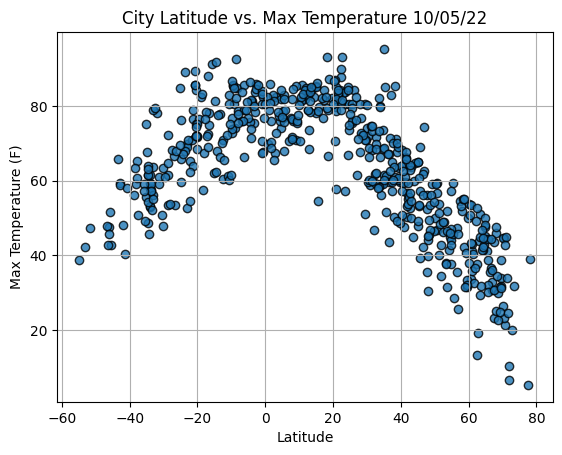

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

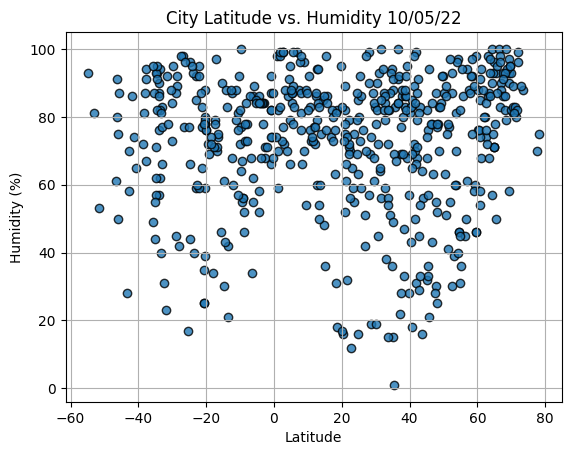

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

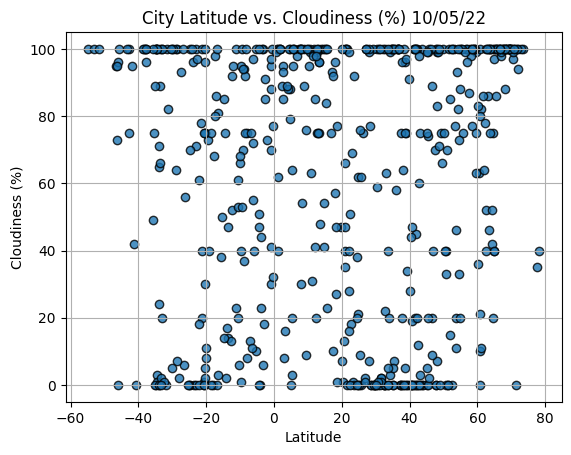

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

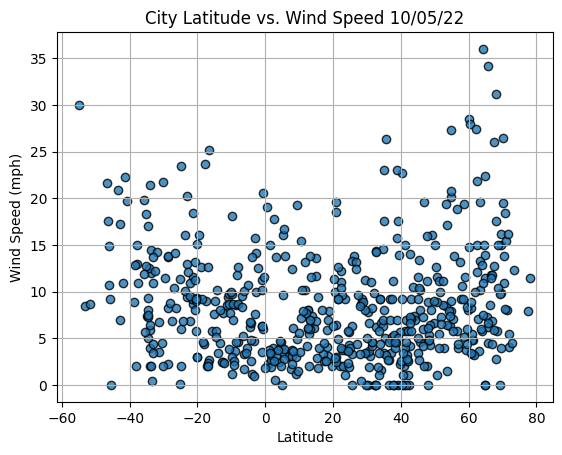

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Lat                      -46.1927
Lng                      168.8643
Max Temp                    47.48
Humidity                       91
Cloudiness                     73
Wind Speed                  10.65
Country                        NZ
Date          2022-10-06 02:03:55
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
549     True
550     True
551     True
552     True
553    False
Name: Lat, Length: 554, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Saint George,37.1041,-113.5841,82.94,22,0,3.44,US,2022-10-06 02:05:22
3,Jamestown,42.0970,-79.2353,55.04,68,0,1.01,US,2022-10-06 02:05:06
4,Norman Wells,65.2820,-126.8329,41.25,78,100,7.31,CA,2022-10-06 02:04:14
5,Lavrentiya,65.5833,-171.0000,38.77,93,100,34.11,RU,2022-10-06 02:05:26
6,Cabra,37.4725,-4.4421,65.10,69,0,4.72,ES,2022-10-06 02:05:26


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Saint George,37.1041,-113.5841,82.94,22,0,3.44,US,2022-10-06 02:05:22
3,Jamestown,42.0970,-79.2353,55.04,68,0,1.01,US,2022-10-06 02:05:06
4,Norman Wells,65.2820,-126.8329,41.25,78,100,7.31,CA,2022-10-06 02:04:14
5,Lavrentiya,65.5833,-171.0000,38.77,93,100,34.11,RU,2022-10-06 02:05:26
6,Cabra,37.4725,-4.4421,65.10,69,0,4.72,ES,2022-10-06 02:05:26


In [31]:
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lobito,-12.3481,13.5456,70.88,87,92,7.67,AO,2022-10-06 02:05:25
1,Namibe,-15.1961,12.1522,62.01,90,50,7.61,AO,2022-10-06 02:05:25
7,Esperance,-33.8667,121.9000,57.96,57,24,21.41,AU,2022-10-06 02:02:56
9,Ushuaia,-54.8000,-68.3000,38.86,93,100,29.93,AR,2022-10-06 02:02:50
13,Mataura,-46.1927,168.8643,47.48,91,73,10.65,NZ,2022-10-06 02:03:55


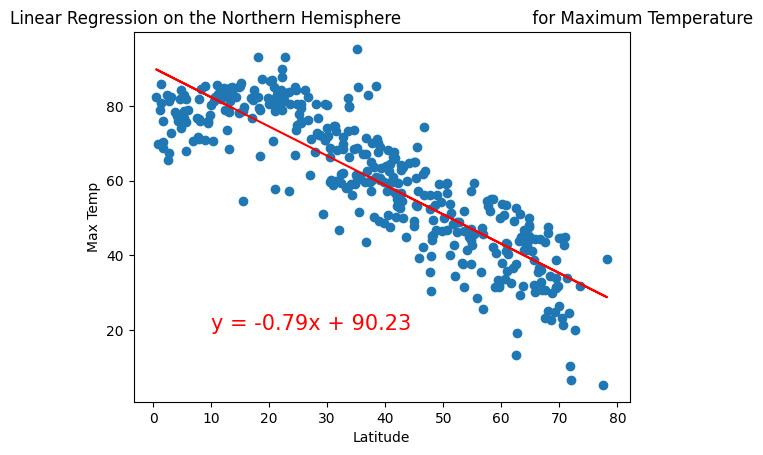

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,20))

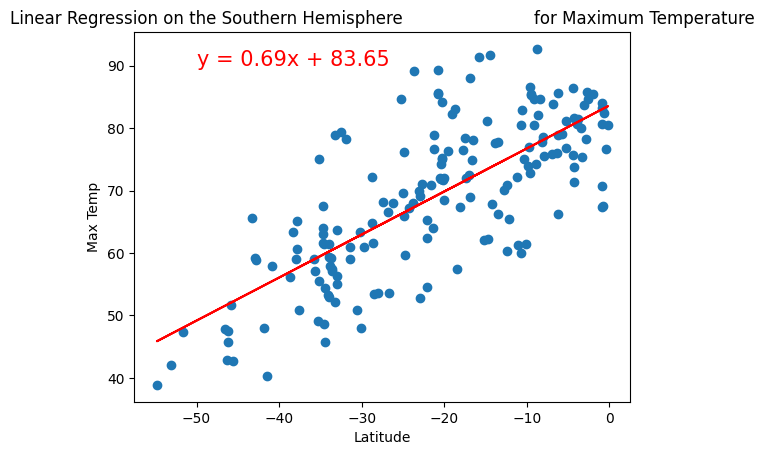

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

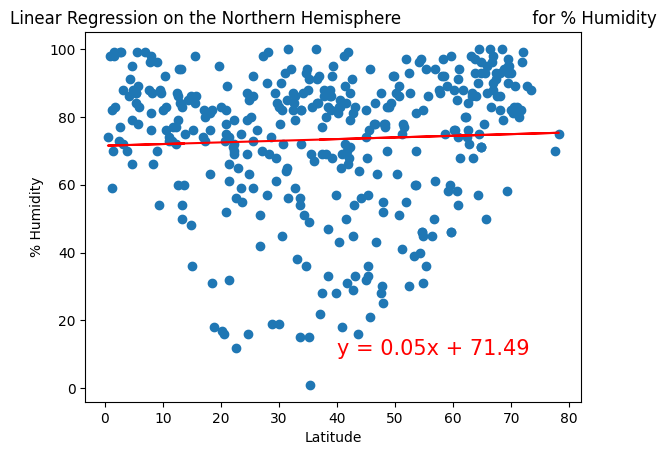

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

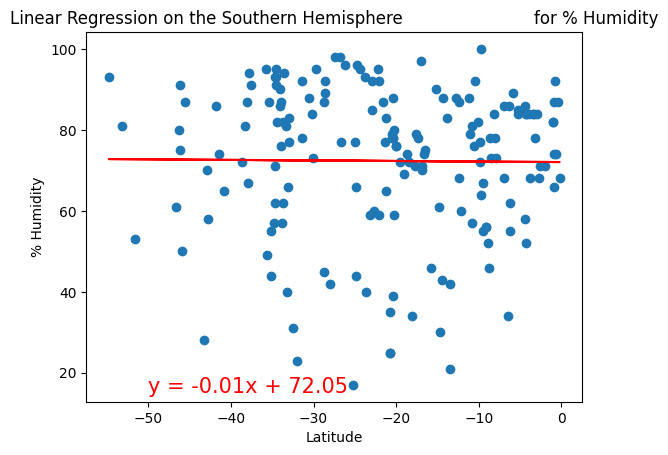

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

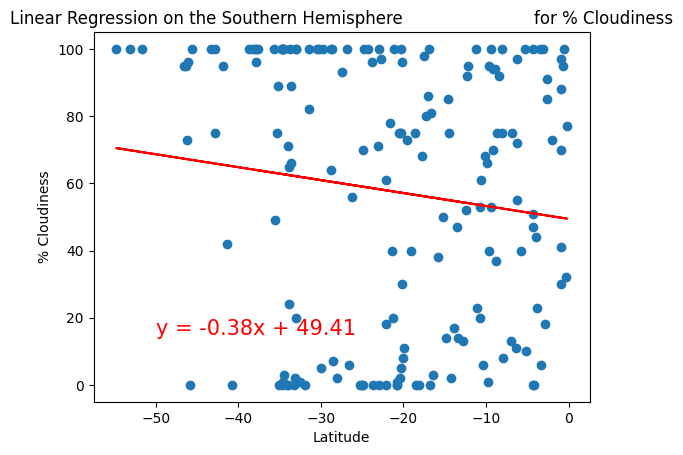

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

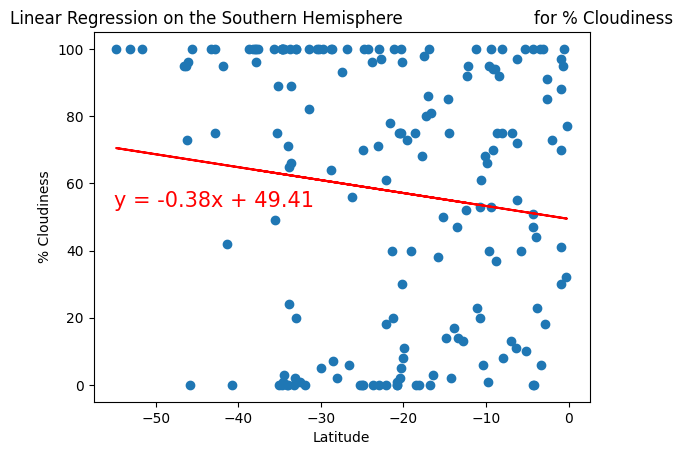

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,53))

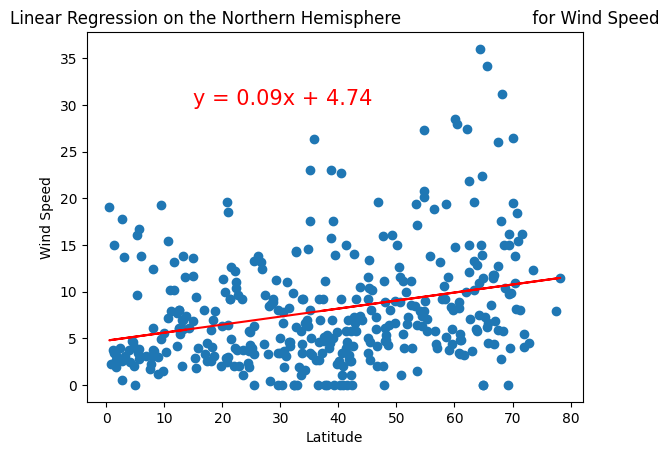

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(15,30))

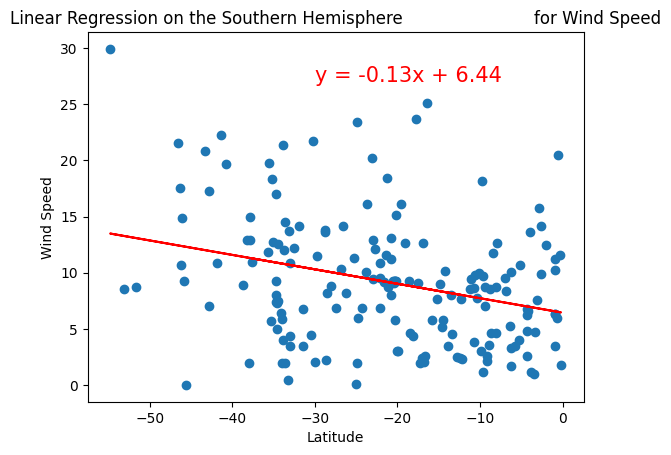

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,27))